In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


In [5]:
#Veriyi İşleme 
df = pd.read_csv('diabetes.csv')
print("Veri seti ilk 5 satır:")
print(df.head())

Veri seti ilk 5 satır:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


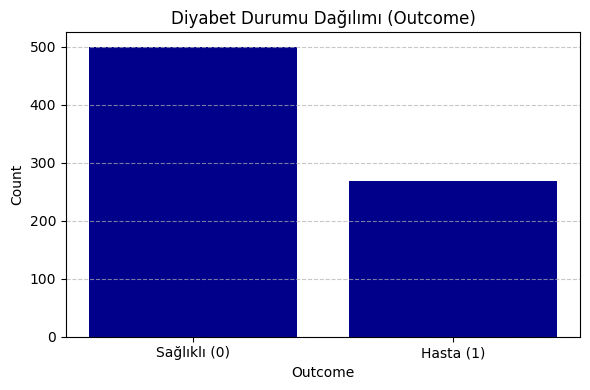

In [12]:
#Hedef Değişken Dağılımı
X = df.drop('Outcome', axis=1)  
y = df['Outcome']
outcome_counts = df['Outcome'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
plt.bar(['Sağlıklı (0)', 'Hasta (1)'], outcome_counts.values, color=['darkblue', 'darkblue'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Diyabet Durumu Dağılımı (Outcome)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 


In [13]:
#Eğitim ve Test Ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
#Veri Standardizasyonu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
#Model Oluşumları
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
}


Logistic Regression Test Doğruluğu: 0.7532
Logistic Regression Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



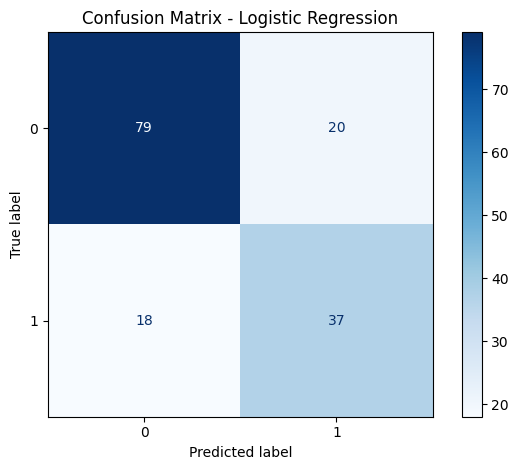


KNN Test Doğruluğu: 0.6948
KNN Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



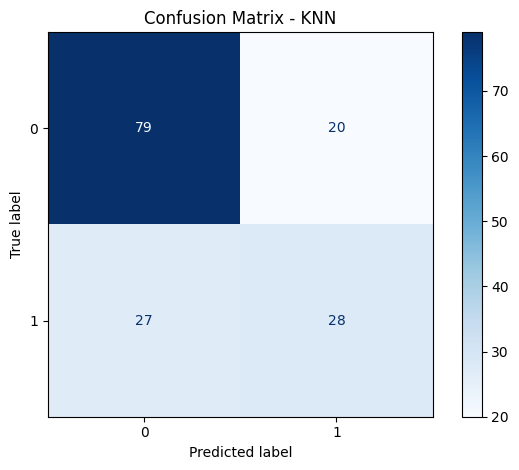


Decision Tree Test Doğruluğu: 0.7468
Decision Tree Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



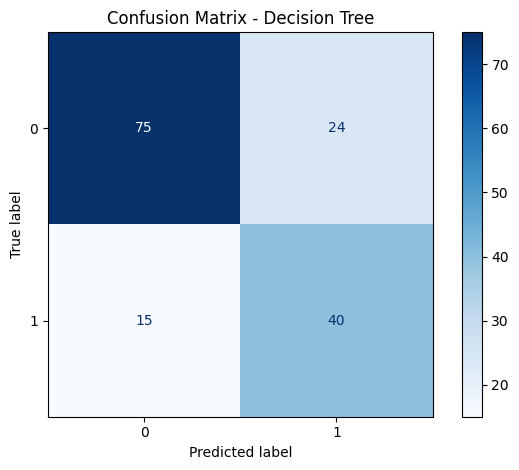


Naive Bayes Test Doğruluğu: 0.7662
Naive Bayes Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



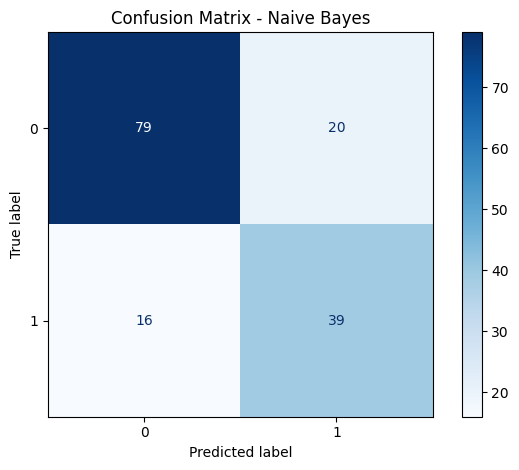


MLP Test Doğruluğu: 0.7403
MLP Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



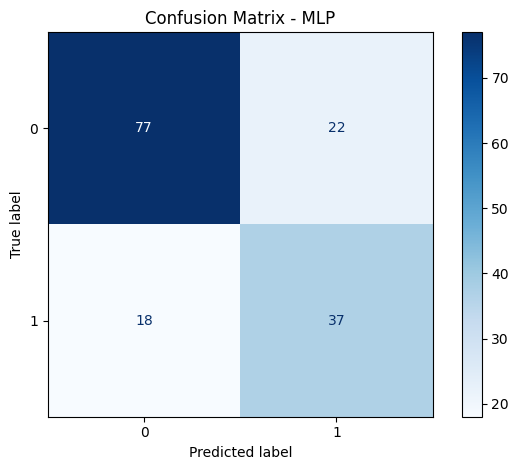

In [22]:
#Modellerin Doğruluk Oranları ve Grafikleştirilmiş Halleri
for name, clf in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"\n{name} Test Doğruluğu: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} Sınıflandırma Raporu:\n{classification_report(y_test, y_pred)}")

    disp = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap='Blues')
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

In [25]:
#Hiperparametre Optimizasyon Girdisi
param_grids = {
    'Naive Bayes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    }
}
print(param_grids)

{'Naive Bayes': {'classifier__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}}


In [26]:
#Hiperparametre Optimizasyonu
for name, clf in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    if name == 'Naive Bayes':
        print(f"\n{name} için hiperparametre optimizasyonu yaptırılıyor.")
        grid_search = GridSearchCV(
        estimator = pipeline,
        param_grid = param_grids[name],
        cv = 5,
        scoring = 'accuracy',
        n_jobs = -1,
        verbose = 1
        )
        grid_search.fit(X_train, y_train) 
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        print(f"En iyi parametreler: {grid_search.best_params_}")
        print(f"En iyi çapraz doğrulama skoru: {grid_search.best_score_:.4f}")


Naive Bayes için hiperparametre optimizasyonu yaptırılıyor.
Fitting 5 folds for each of 5 candidates, totalling 25 fits
En iyi parametreler: {'classifier__var_smoothing': 1e-09}
En iyi çapraz doğrulama skoru: 0.7525


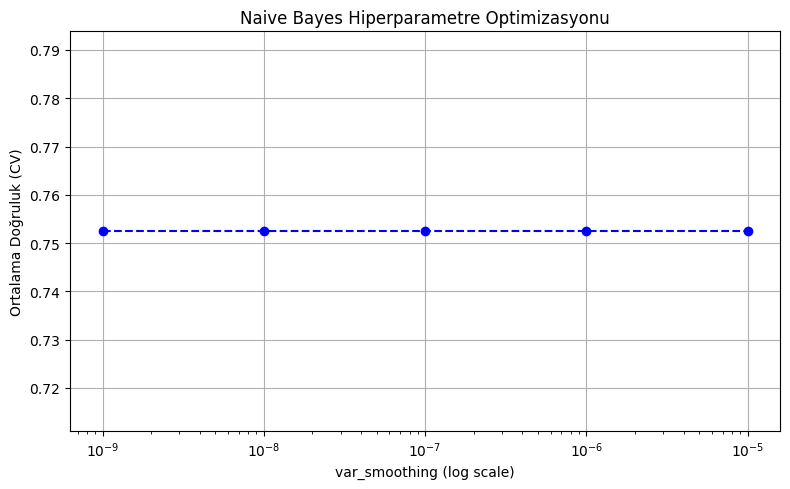

In [27]:
#En İyi Doğruluğu Veren Modelin Hİperparametre Grafikleri
results = grid_search.cv_results_
param_values = results['param_classifier__var_smoothing']
mean_scores = results['mean_test_score']

# Grafik çizimi
plt.figure(figsize=(8, 5))
plt.plot(param_values, mean_scores, marker='o', linestyle='--', color='b')
plt.xscale('log')  # Çünkü var_smoothing log ölçeklidir
plt.xlabel('var_smoothing (log scale)')
plt.ylabel('Ortalama Doğruluk (CV)')
plt.title('Naive Bayes Hiperparametre Optimizasyonu')
plt.grid(True)
plt.tight_layout()
plt.show()


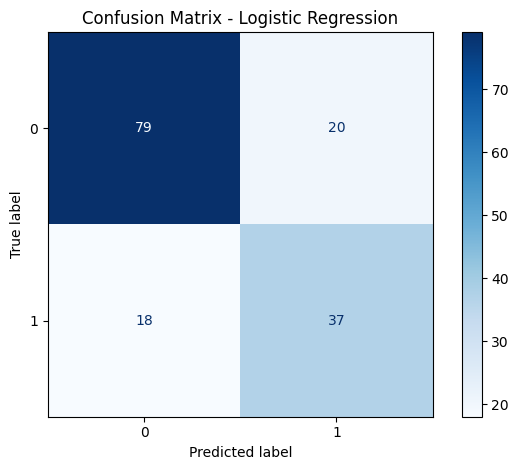

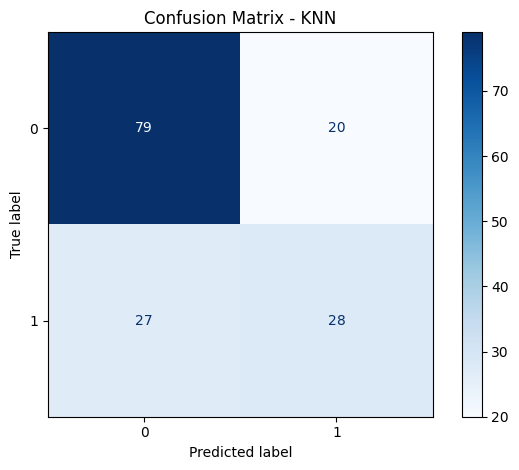

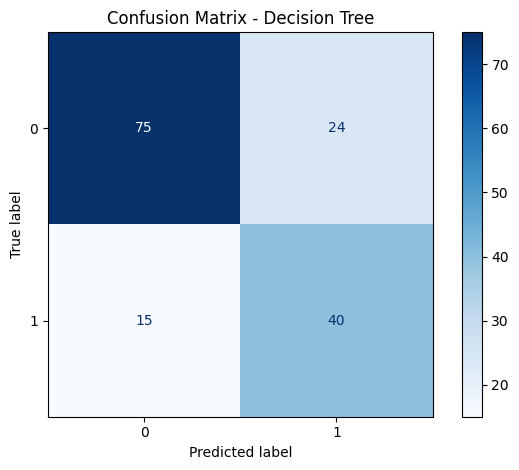

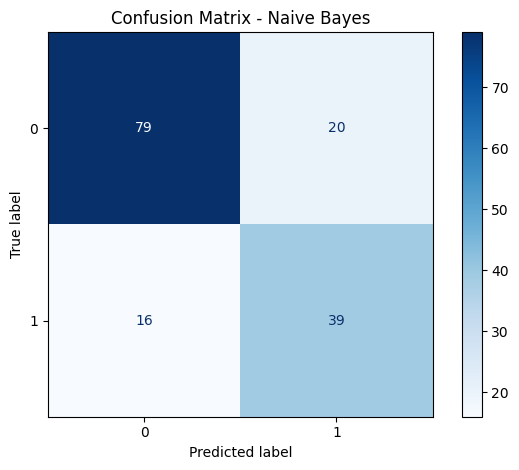

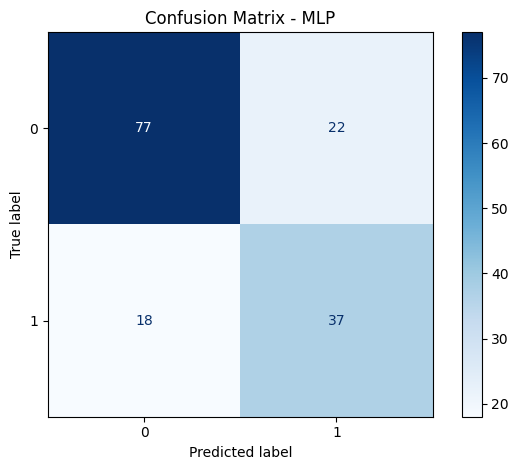

In [30]:
#Tüm Modellerin ConfusionMatrixDisplay Grafikleri
for name, clf in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    
    pipeline.fit(X_train, y_train)
    
    disp = ConfusionMatrixDisplay.from_estimator(
        pipeline,           
        X_test,             
        y_test,             
        cmap='Blues',       
        values_format='d'   
    )
    
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()


In [32]:
#Gerçek ve Tahmin Verileri
wrong_indices = np.where(y_pred != y_test)[0]


wrong_samples = X_test.iloc[wrong_indices]
wrong_actuals = y_test.iloc[wrong_indices]
wrong_predictions = y_pred[wrong_indices]


wrong_df = wrong_samples.copy()
wrong_df['Gerçek'] = wrong_actuals.values
wrong_df['Tahmin'] = wrong_predictions

print(wrong_df.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
473            7      136             90              0        0  29.9   
204            6      103             72             32      190  37.7   
336            0      117              0              0        0  33.8   
148            5      147             78              0        0  33.7   
667           10      111             70             27        0  27.5   

     DiabetesPedigreeFunction  Age  Gerçek  Tahmin  
473                     0.210   50       0       1  
204                     0.324   55       0       1  
336                     0.932   44       0       1  
148                     0.218   65       0       1  
667                     0.141   40       1       0  
